## Churn prediction

###  Churn prediction  in the bank customers.

The project concerns churn prediction in the bank customers. Based on data we are going to try to predict whether the client is going to leave the bank or not by using information like credit score, tenure, salary, etc. 

Churn is a term that means losing customers to the competition. A “Churned” customer is one who has cancelled their service and identification of such users beforehand can be invaluable from the company's point of view. It is very important because retain customers who want to leave us is in many cases much cheaper than acquiring new ones.


In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


### Import libriaries and data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

# Model packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


import warnings
warnings.simplefilter('ignore')

In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


First observations:

In [7]:
print(f'Shape of data:', df.shape)

Shape of data: (10000, 14)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
#columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Checking the missing values in data:

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Number of unique values in Geography variable:

In [13]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

The dataset includes information about 10000 customers placed in  14 columns. The atribute "Exited" is our churn and shows about whether the client resigned from the bank's services or not. After first observations we see that there are no missing values. The column names are explicit, so it can easily infer that what are we see in this dataset. 

### Exploratory Data Analysis


**Churn analysis** 

In our data churn is marked as Exited where 1 = churn and 0 = no churn.

What part of the set is churn?

In [17]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

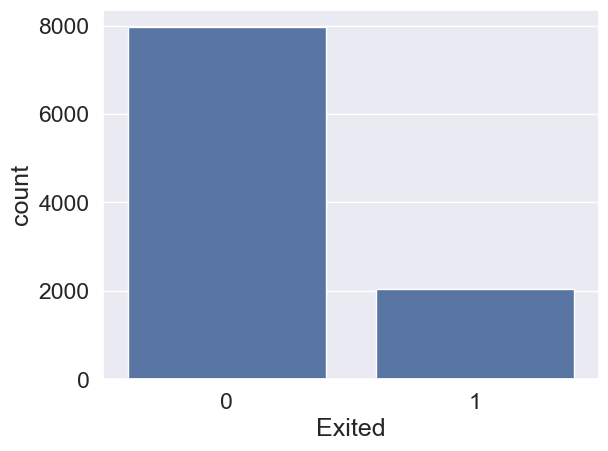

In [18]:
sns.set(font_scale=1.5)
sns.countplot(x=df['Exited'])
plt.show()

In percentage terms:

In [20]:
percent = df.groupby('Exited')['Exited'].count() / df.shape[0] * 100
percent

Exited
0    79.63
1    20.37
Name: Exited, dtype: float64

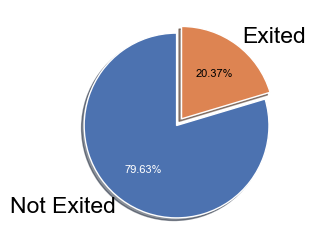

In [21]:
labels = ['Not Exited', 'Exited']
fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(percent, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

One can see 20% of the customers have churned and 80% haven't.

The above analysis showed that the data is imbalanced, more customers stay than those who leave. We will need to account for this when building models and their evaluation.

##### The analysis of other variables.

**Gender distribution:**

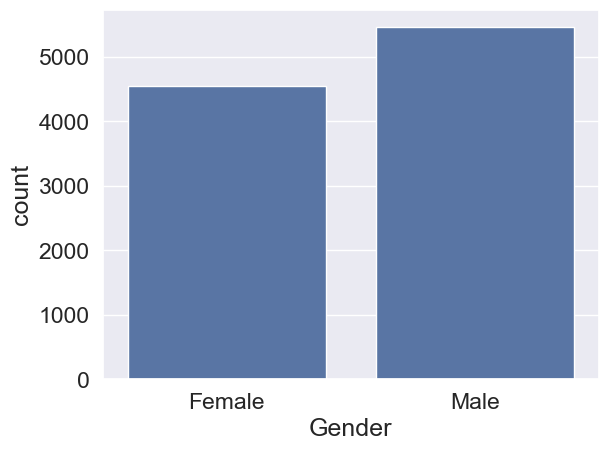

In [24]:
sns.set(font_scale=1.5)
sns.countplot(x=df['Gender'])
plt.show()

**Age distribution:**

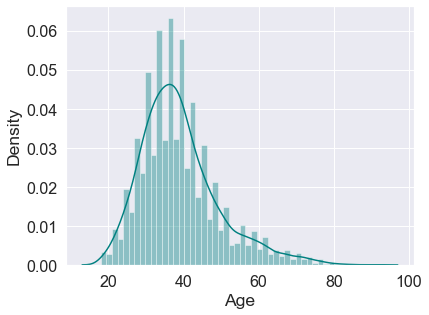

In [26]:
plt.figure(dpi = 70)
sns.distplot(df.Age, color = 'teal')
plt.show();

We display min and max age:

In [28]:
print("The maximum age is", df["Age"].max())
print("The minimum age is", df["Age"].min())

The maximum age is 92
The minimum age is 18


**Geography distribution:**

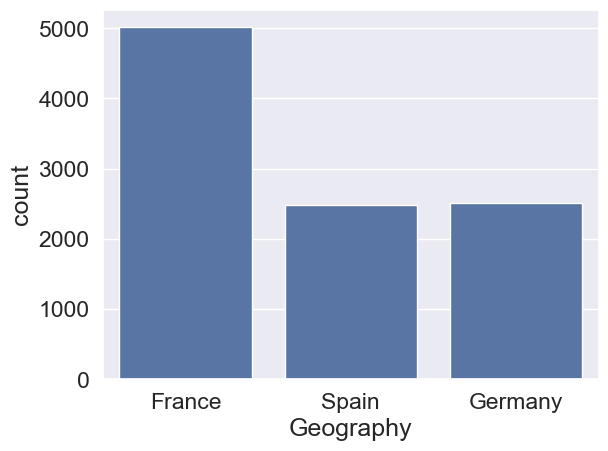

In [30]:
sns.set(font_scale=1.5)
sns.countplot(x=df['Geography'])
plt.show()

Region by gender:

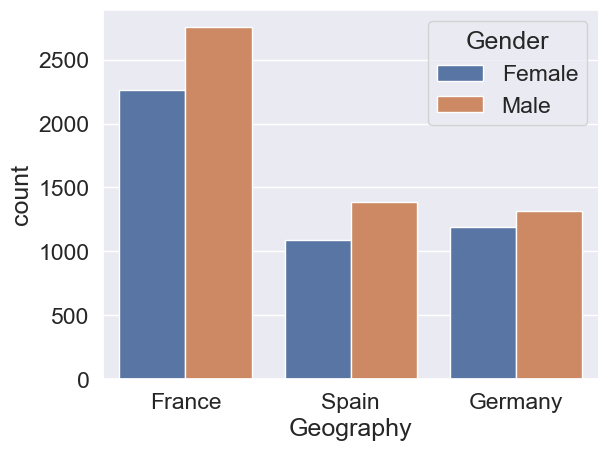

In [32]:
sns.set(font_scale=1.5)
sns.countplot(x=df['Geography'],hue=df['Gender'])
plt.show()

One can see there are more men than women and the most people are from 30 to 40 age. The youngest clients are 18 and the oldest are 92. The half of the dataset is from France so we can suppose that it is the main headquarters and some offices are in Spain and Germany.

##### The short analysis of churn with other variables:

**Gender and Geography:**

In [36]:
df["Exited"][df["Exited"]==1].groupby(by=df["Gender"]).count()

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

In [37]:
df["Exited"][df["Exited"]==0].groupby(by=df["Gender"]).count()

Gender
Female    3404
Male      4559
Name: Exited, dtype: int64

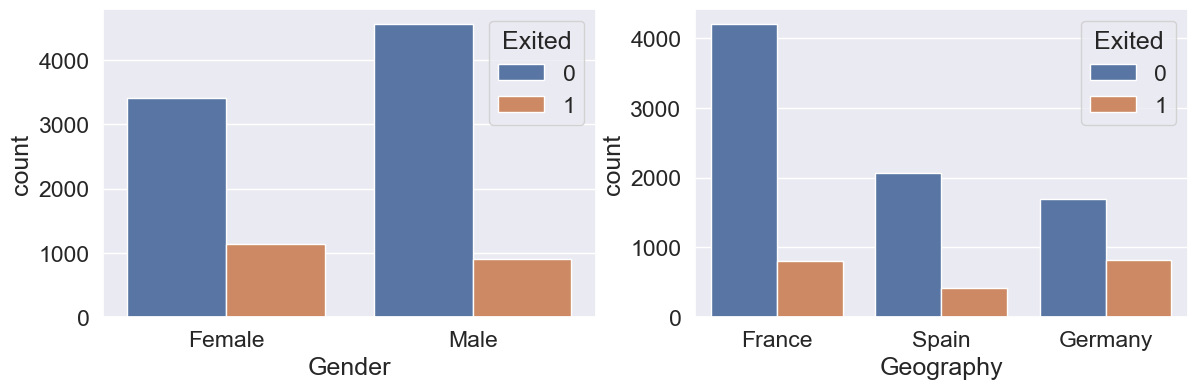

In [38]:
fig,ax = plt.subplots(1,2,figsize=(14,4))
sns.set(font_scale=1.5)
sns.countplot(data=df,x='Gender',hue='Exited',ax=ax[0])
sns.countplot(data=df,x='Geography',hue='Exited',ax=ax[1])
plt.show()

**Age:**

In [40]:
churn = df.loc[df['Exited'] == 1]

In [41]:
age = churn[['Exited','Age']].groupby("Age").count().sort_values('Exited', axis=0, ascending = False)
age.head()

,Exited
Age,
46,91
40,89
43,88
45,87
48,80


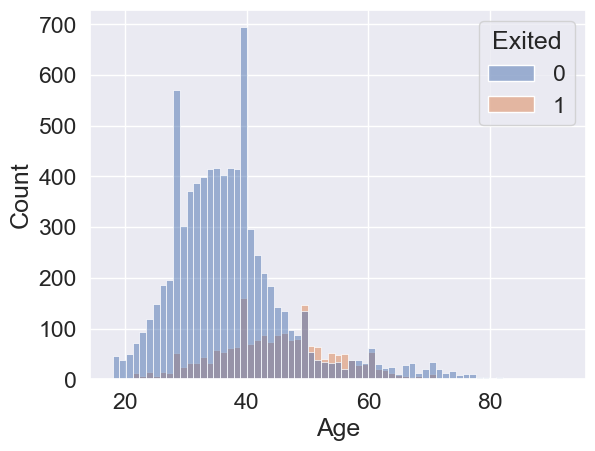

In [42]:
sns.set(font_scale=1.5)
sns.histplot(data=df,x='Age',hue='Exited')
plt.show()

**Tenure**

Effect of tenure duration on churn:

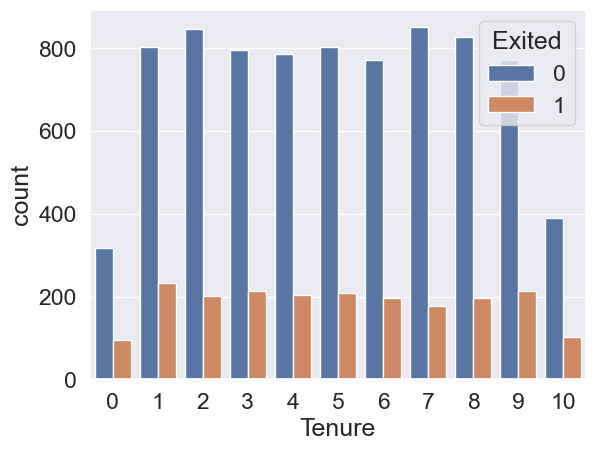

In [44]:
sns.set(font_scale=1.5)
sns.countplot(x=df['Tenure'],hue=df['Exited'])
plt.show()

**Number of products:**

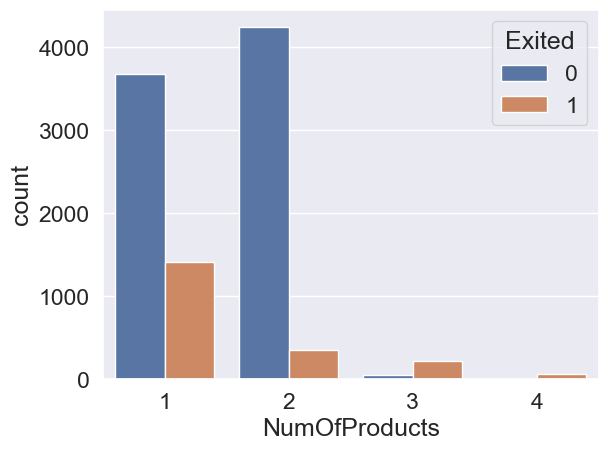

In [46]:
sns.set(font_scale=1.5)
sns.countplot(x=df['NumOfProducts'],hue=df['Exited'])
plt.show()

**IsActiveMember and HasCrCard**

Is active member and has a card:

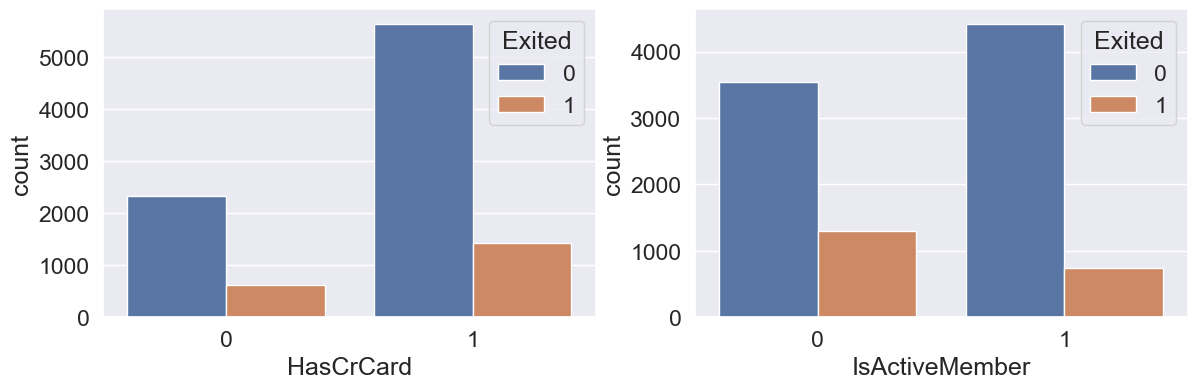

In [48]:
fig,ax = plt.subplots(1,2,figsize=(14,4))
sns.set(font_scale=1.5)
sns.countplot(data = df, x='HasCrCard', hue = 'Exited', ax = ax[0])
sns.countplot( data = df, x='IsActiveMember', hue = 'Exited', ax = ax[1])
plt.show()

**CreditScore:**

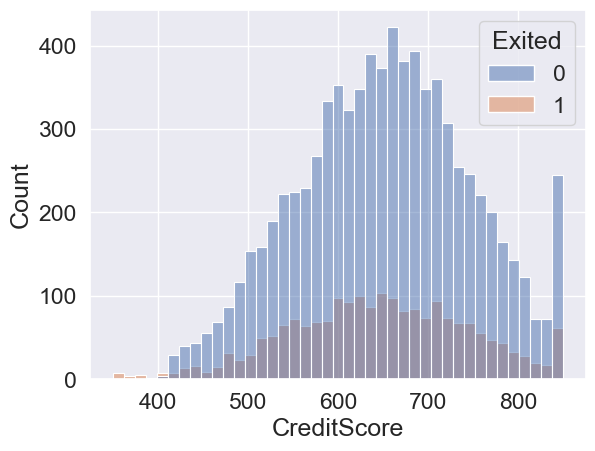

In [50]:
sns.set(font_scale=1.5)
sns.histplot(data=df,x='CreditScore',hue='Exited')
plt.show()

**Balance and EstimatedSalary:**

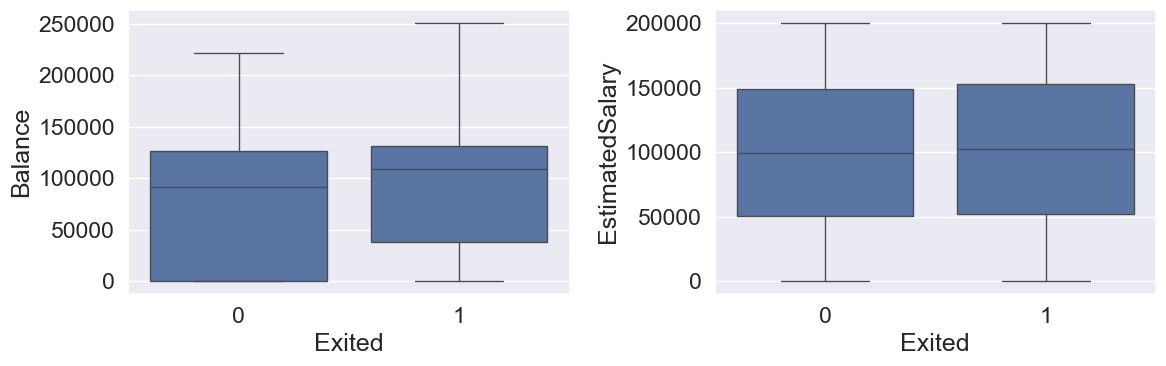

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1])
plt.tight_layout()
plt.show()

### Checking statistics

In [54]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Correlation:**

Correlation allows to look at the relationships between numeric features. 

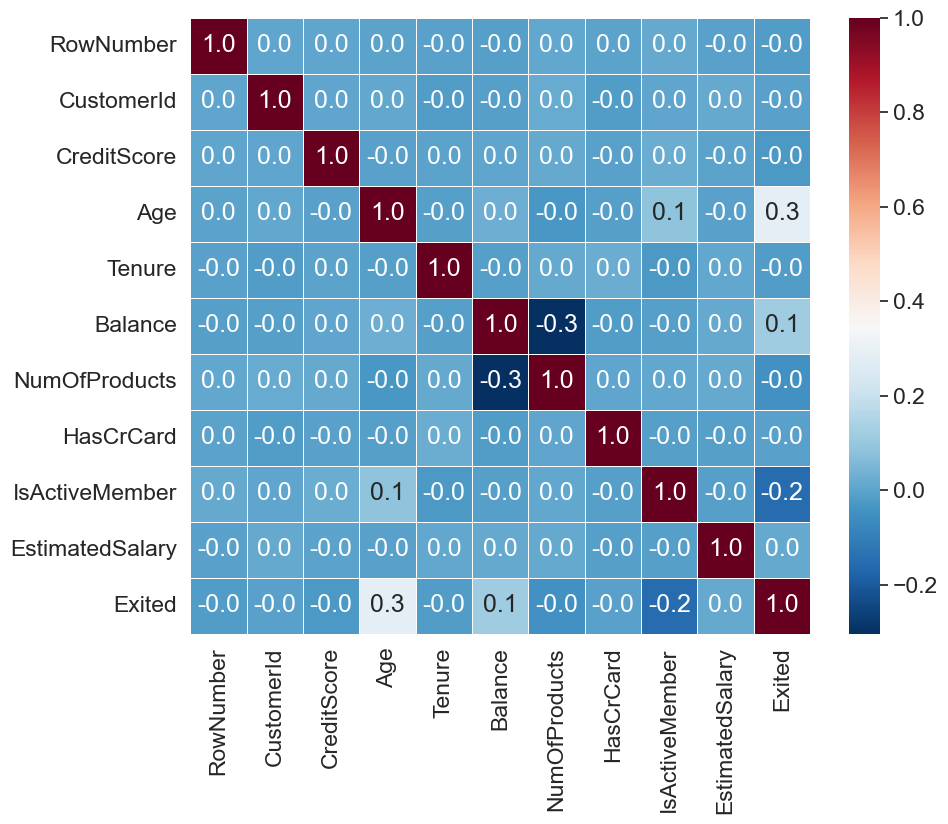

In [56]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.select_dtypes(include='number').corr(), annot = True, linewidth=0.5, fmt='0.1f', cmap = 'RdBu_r')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

From above heatmap we see there are no strong correlations between variables.

### Data cleaning

First we delate unnecessary columns such as "CustomerId", "Surname" and "RowNumber" because they do not have any logical contribution to our prediction. We also convert non numeric features to numeric features. 


In [59]:
data = df.drop(['CustomerId','Surname','RowNumber'],axis=1)

In [60]:
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})

In [61]:
data = pd.get_dummies(data, columns = ['Geography'])

In [62]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


### Data preparation

Spliting data into train and test set.

Our data are exhibit a large imbalance in the distribution of the target classes hence we have to maintain the class proportion in the train-test sets.  For this purpose we use stratified sampling to ensure relative class frequencies is approximately preserved in each train and validation fold.

Stratification makes even distribution of the target(label) in the train and test set - just as it is distributed in the original dataset. For example the target column for the training set has 80% of 'yes' and 20% of 'no', and also, the target column for the test set has 80% of 'yes' and 20% of 'no' respectively.

In [64]:
X = data.drop('Exited', axis=1)
Y = data['Exited']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10, stratify=Y)

**Scaling data**

We scale the data so that datapoints are on the same level.

In [67]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Build models

The churn is not simple to predict. Deciding to churn is often subjective. The one client may churn because of costs issues and other may churn because of quality. In addition bad customer service also may trigger the decision to churn subjectively. 

One of the most common classification evaluation metric is accuracy, i.e. the number of correct predictions made as a ratio of total predictions. However, it's not the ideal metric when we have class imbalance issue. Because our dataset is unbalanced we use cross validation method to sort our results. To measure models performances we use the 'roc auc score'. 


We will test a few models for our problem:

- Logistic Regression,
- Random Forest,
- K-Nearest Neighbors,
- Ada Boost,
- XGBoost.

At the beginning we create some useful functions:

In [69]:
def plot_conf_matrix(pred_set):
    """The function to plot confusion matrix"""
    plt.figure(figsize=(6,4))
    ax = sns.heatmap(confusion_matrix(y_test, pred_set),
                annot=True,fmt = "0.1f",linecolor="k",linewidths=3)
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))   

    plt.title("Confusion Matrix",fontsize=14)
    plt.show()
    

def plot_roc_curve(model):
    """The function to plot roc curve"""
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr, tpr, label='ROC' ,color = 'red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    

def acc_score(model):
    """The function to calculate accuracy score"""
    acc = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    score = round(acc.mean(), 2)
    return score


def roc_score(model):
    """Roc auc score calculation"""
    pred_prob = model.predict_proba(X_test)
    score = roc_auc_score(y_test, pred_prob[:,1])
    auc_score = round(score, 2)
    return auc_score

**1. Logistic regression**

In [71]:
logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

Evaluation:

In [73]:
acc_log = acc_score(logReg)
print('Accuracy score: %s' % acc_log)

roc_log = roc_score(logReg)
print('ROC AUC: %s' % roc_log)

Accuracy score: 0.81
ROC AUC: 0.77


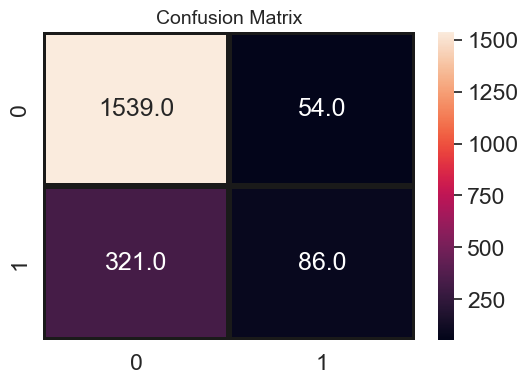

In [74]:
plot_conf_matrix(y_pred)

**2. Random Forest Classifier**

In [76]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
model_rf.fit(X_train, y_train)

pred_y = model_rf.predict(X_test)

Evaluation:

In [ ]:
acc_rf = acc_score(model_rf)
print('Accuracy score: %s' % acc_rf)

roc_rf = roc_score(model_rf)
print('ROC AUC: %s' % roc_rf)

In [ ]:
plot_conf_matrix(pred_y)

Roc curve for Random Forest model:

In [ ]:
plot_roc_curve(model_rf)

**3. K-Nearest Neighbors**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=20, metric="minkowski", p=2) 
knn_model.fit(X_train,y_train)

pred = knn_model.predict(X_test)

Evaluation:

In [ ]:
acc_knn = acc_score(knn_model)
print('Accuracy score: %s' % acc_knn)

roc_knn = roc_score(knn_model)
print('ROC AUC: %s' % roc_knn)

In [ ]:
plot_conf_matrix(pred)

**4. AdaBoost Classifier**

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=200 ,random_state=0)
ada_model.fit(X_train,y_train)

preds = ada_model.predict(X_test)

Evaluation:

In [ ]:
acc_ada = acc_score(ada_model)
print('Accuracy score: %s' % acc_ada)

roc_ada = roc_score(ada_model)
print('ROC AUC: %s' % roc_ada)

In [ ]:
plot_conf_matrix(preds)

In [ ]:
plot_roc_curve(ada_model)

**5. XGBoost Classifier**

In [ ]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)

predict = xgb.predict(X_test)

Evaluation:

In [ ]:
acc_xgb = acc_score(xgb)
print('Accuracy score: %s' % acc_xgb)

In [ ]:
roc_xgb = roc_score(xgb)
print('ROC AUC: %s' % roc_xgb)

In [ ]:
plot_conf_matrix(predict)

Roc curve for XGBoost model:

In [ ]:
plot_roc_curve(xgb)

#### Feature Evaluation

We check which features play the most important role in the identification of customer churn. We use an attribute named feature_importance that contains information about the most important features for a given classification. Our best model is Random Forest one and we use it for analysis.

The following code creates a plot of the top 10 features for predicting customer churn:

In [ ]:
rf_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
rf_importances.nlargest(10).plot(kind='barh')

Based on this data we can see that Age has the highest impact on customer churn, followed by a customer's estimated salary and Credit Score.

### Best model

We have tested five different models and now we check which one is the best:


In [ ]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'AdaBoost', 'XGBoost'],
                      'ROC_AUC': [roc_log, roc_rf, roc_knn, roc_ada, roc_xgb],
                      'Accuracy_score': [acc_log, acc_rf, acc_knn, acc_ada, acc_xgb]})

models.sort_values(by='ROC_AUC', ascending=False)

From above analysis we see that the best model is Random Forest with ROC AUC score of 86% and accuracy score of 86%. This model has achaived the best result both in ROC AUC score and Accuracy score and this is signalling the characteristics of a reasonably good model with comparision to others ones.

Interpreting the ROC curve:

The ROC curve graph shows the capability of a model to distinguish between the classes based on the AUC Mean score. The dashed line represents the ROC curve of a random classifier where a good classifier tries to remain as far away from that line as possible. As shown in the graph below the Random Forest model showcased a higher AUC score near to left-top corner.

In [ ]:
# ROC curve of Ranfom Forest
plot_roc_curve(model_rf)

Interpreting the confusion matrix of the best model:

The Confusion matrix indicates that we have 192+1541 correct predictions and 215+52 incorrect ones. We can say that the model predicted 244 customers churning of those 192 did and 52 stayed. In the other hand the 407 customers that actually churned, 215 were predicted to stay. 


In [ ]:
#Random Forest confusion matrix
plot_conf_matrix(pred_y)  

### Summary

This project was aimed to churn prediction in the bank customers. We started with data analysis to better meet our data. Then we cleaned data and prepared to the modelling. Following we have used five different classification models such as Logistic Regression, KNN, Random Forest, Ada Boost and XGBoost to achaived the best model. Finally we evaluated our models with a few methods to check which model is the best. We used a ROC AUC score, k-fold Cross Validation, ROC curve and confusion matrix. After checked all of this metrics the best classification algorithm that we got are Random Forest with ROC AUC score 85%. It is a reasonably good model but we could be made a many improvement such as tuning the hyperparameter etc. to achaived a better results.